In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
import plotly.express as px
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


In [3]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn
!pip install imbalanced-learn

!pip install scikit-learn imbalanced-learn


In [4]:
#import dataset
raw_df = pd.read_csv(r"C:\Users\mlike\OneDrive\Masaüstü\Credit Card Fraud detection Master Thesis Project\creditcard.csv")

In [5]:
## What is in the data
print(raw_df.columns)
print(raw_df.shape)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [6]:
raw_df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [7]:
import plotly.express as px

# Assuming you already have the 'raw_df' DataFrame and 'labels' defined
fraud_or_not = raw_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
labels=["Genuine","Fraud"]
fig = px.pie(values=raw_df['Class'].value_counts(), names=labels, width=700, height=400,
             color_discrete_sequence=["#1f77b4", "#d62728"],  # Custom colors using HEX codes
             title="Fraud vs Genuine transactions",
             hole=0.4  # Adjust the hole parameter to create a doughnut shape
             )

fig.show()


In [8]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print(raw_df.shape) 
print(raw_df.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

DATA PRE_PROCESSING

In [10]:
#drop duplicates
df = raw_df.copy()

df.drop_duplicates(inplace=True)

In [11]:
#### There is a huge risk of overfitting. You have to convince the reader that you do not have such a problem.

# Assuming you have a DataFrame 'df' with columns 'Class' indicating the class (0 for genuine, 1 for fraudulent)

# Separate the data into genuine and fraudulent transactions
genuine_transactions = df[df['Class'] == 0]
fraudulent_transactions = df[df['Class'] == 1]

# Randomly select at least 100 examples from each class for the test set
genuine_test_set = genuine_transactions.sample(n=100, random_state=42)
fraudulent_test_set = fraudulent_transactions.sample(n=100, random_state=42)

# Combine the genuine and fraudulent test sets into a single test set
test_set = pd.concat([genuine_test_set, fraudulent_test_set])

# Remove the selected test examples from the original dataset
df = df.drop(index=test_set.index)

# Now, 'test_set' contains at least 100 examples of each class, and 'df' contains the remaining data for training and other computations.


In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
len(df[df['Class'] == 1])

373

In [14]:
len(df[df['Class'] == 0])

283153

correlation and the most important features

In [15]:
df.corr()["Class"].sort_values()

V17      -0.283636
V14      -0.265421
V12      -0.223695
V10      -0.184799
V16      -0.167426
V3       -0.159786
V7       -0.151507
V18      -0.093323
V9       -0.083729
V1       -0.082398
V5       -0.076948
V6       -0.036790
Time     -0.011686
V24      -0.006444
V13      -0.004051
V23      -0.002981
V15      -0.002745
V25       0.002214
V26       0.003097
V22       0.005126
V28       0.006219
Amount    0.006475
V27       0.017753
V20       0.018211
V21       0.022602
V8        0.024833
V19       0.030721
V2        0.072738
V4        0.115795
V11       0.132412
Class     1.000000
Name: Class, dtype: float64

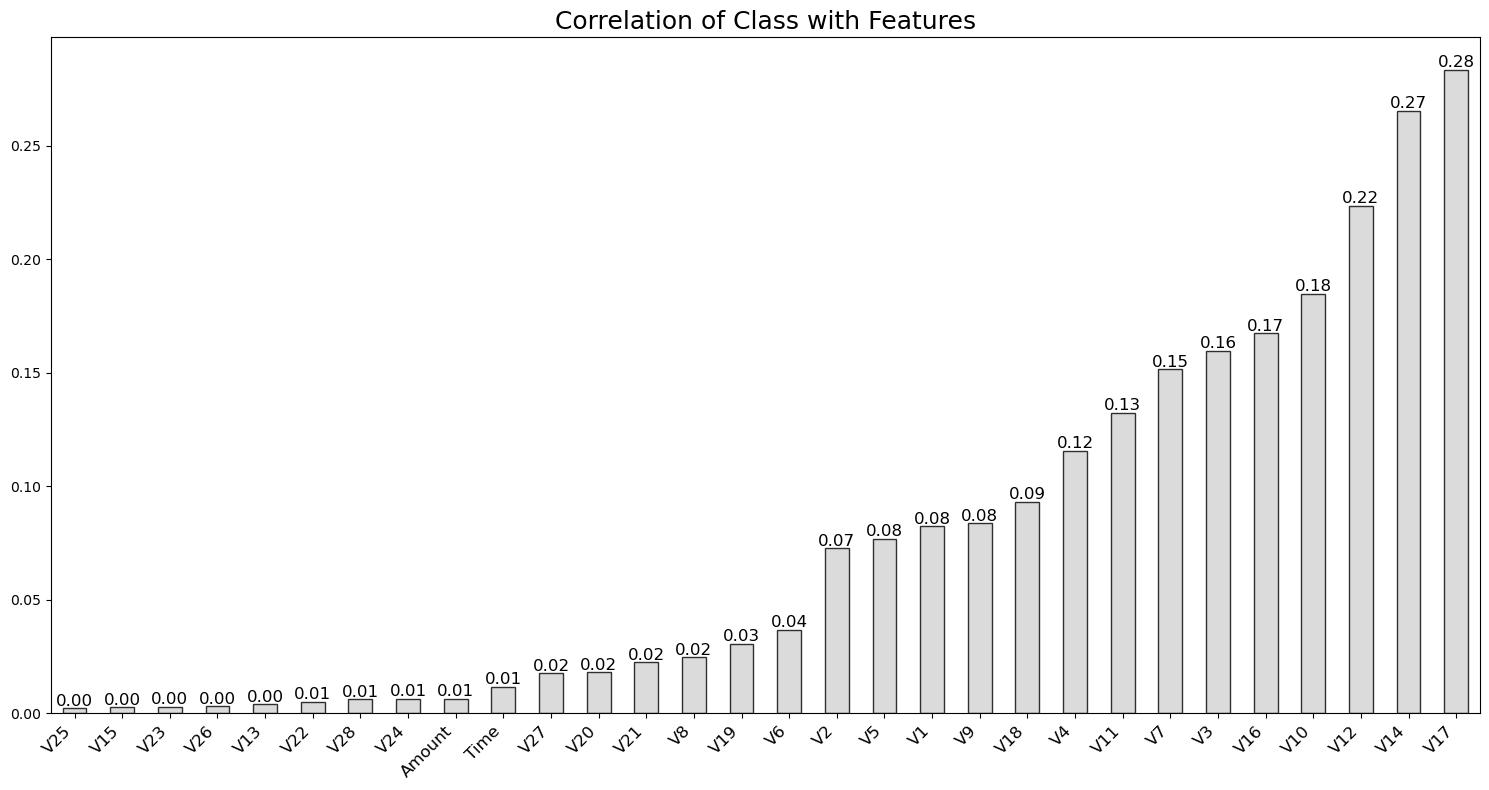

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

# Calculate the correlation values of 'Class' with all other features (excluding 'Class' itself)
correlation_values = df.drop('Class', axis=1).corrwith(df['Class']).abs().sort_values()

# Create a bar plot with custom colors and styles
ax = correlation_values.plot(kind='bar', color=np.where(correlation_values > 0.3, 'skyblue', 'lightgrey'), edgecolor='black', alpha=0.8)

# Adding a custom title
plt.title('Correlation of Class with Features', fontsize=18)

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjusting x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
# Let's take all features with correlation 0.15 and morec = 

c = df.corr()['Class'][:-1].abs() > 0.15

print (c)

Time      False
V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11       False
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


In [18]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")



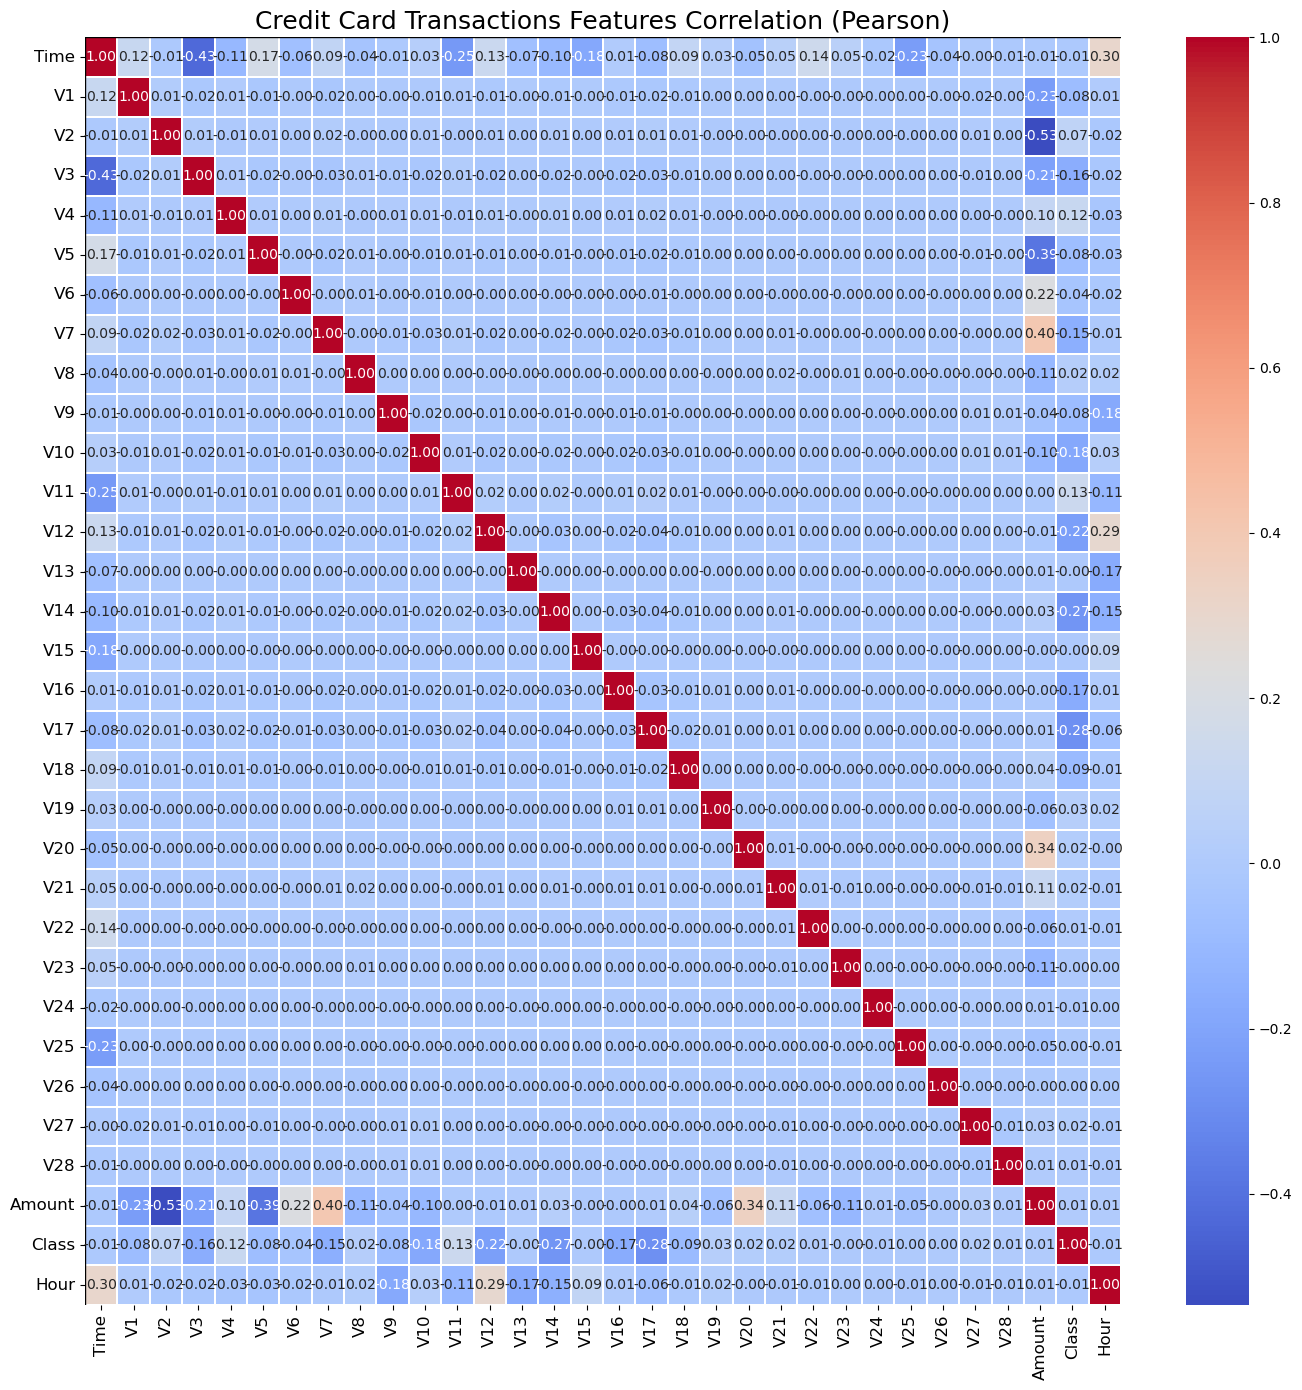

In [19]:
plt.figure(figsize=(14, 14))
plt.title('Credit Card Transactions Features Correlation (Pearson)', fontsize=18)
# Calculate the correlation matrix
corr = df.corr()
# Create a heatmap with custom colors and styles
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="coolwarm", annot=True, fmt=".2f")
# Adding a horizontal line to separate sections
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
# Adjusting x and y tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the plot
plt.tight_layout()
plt.show()

In [20]:
print('Genuine:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Genuine: 99.87 % of the dataset
Frauds: 0.13 % of the dataset


Clustering

In [21]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)


In [22]:
features = df[['V17','V14','V12','V10','V16','V3','V7','V11','V4', 'V4', 'V18', 'V1', 'V9','V5','V2' ]]

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_i

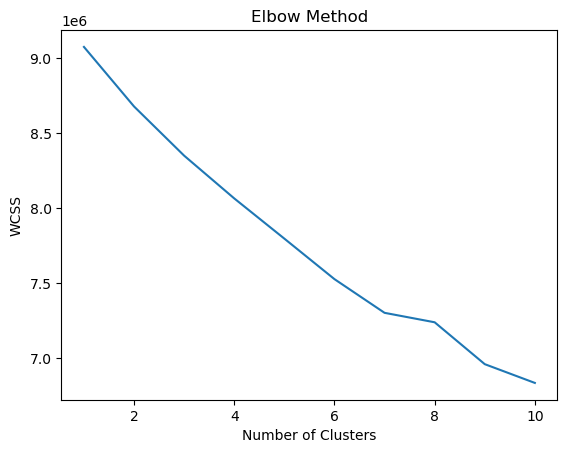

In [23]:
#lets decide number of K in k-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
# it would be better if we go on with 4
num_clusters =5

In [25]:
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
clusters = kmeans.fit_predict(normalized_data)


C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_i

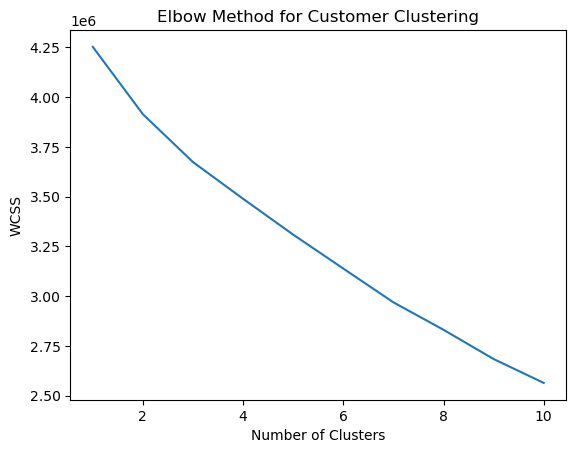

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



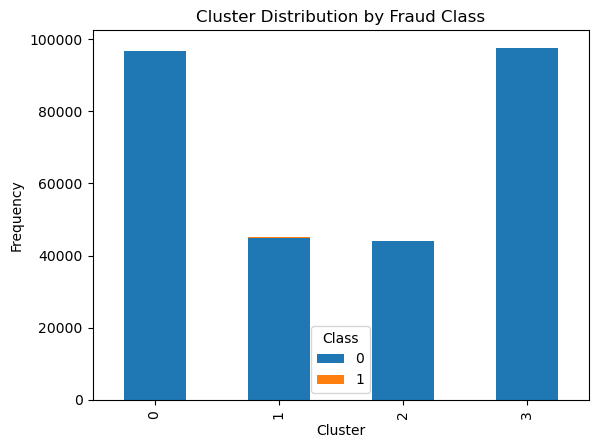

In [26]:
# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Customer Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Assume you decide on a specific number of clusters (e.g., 5)
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(normalized_features)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Analyze the relationship between clusters and the target variable (CLASS)
cluster_target_dist = df.groupby(['Cluster', 'Class']).size().unstack()
cluster_target_dist.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Fraud Class')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()


#box-plot

ValueError: num must be an integer with 1 <= num <= 30, not 31

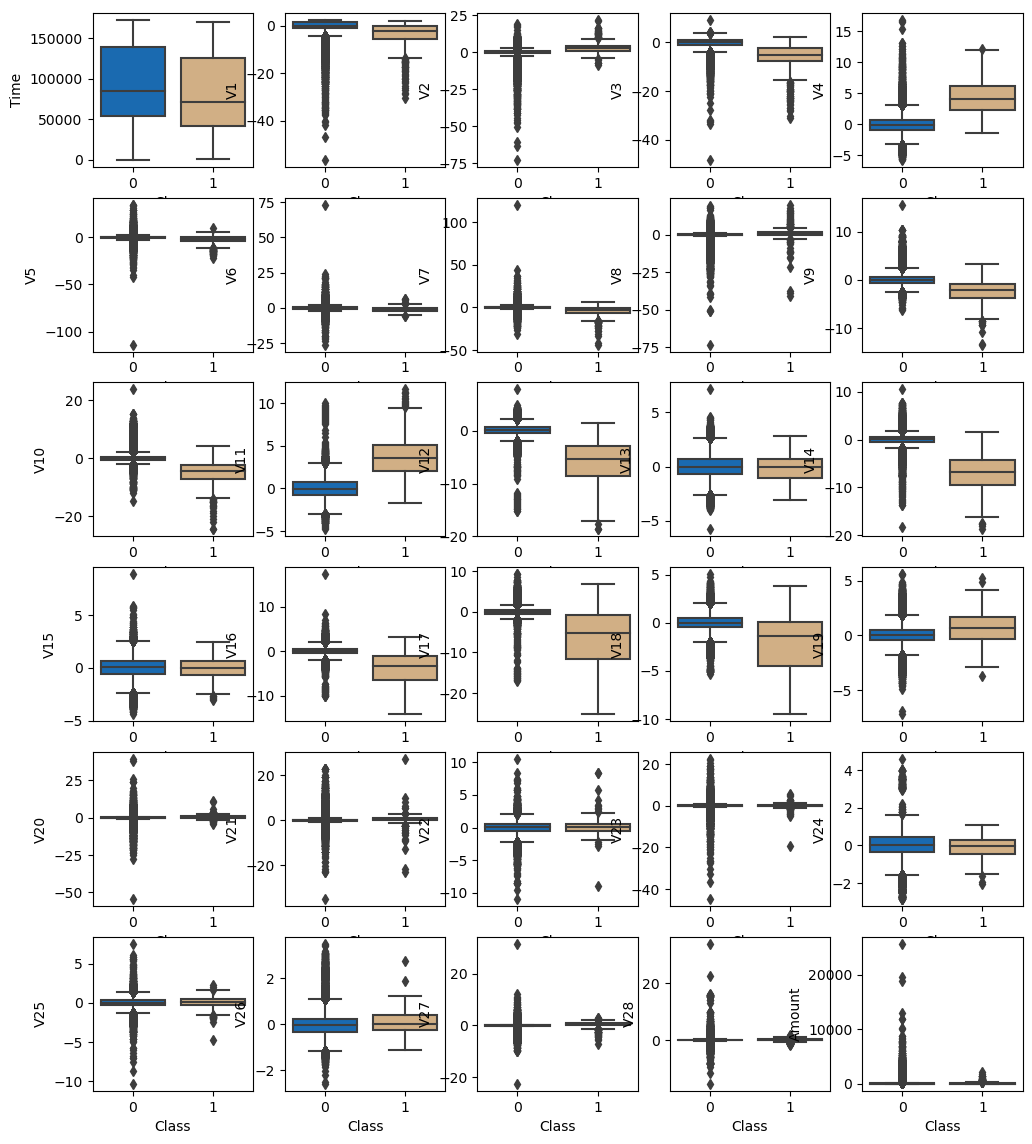

In [27]:
vars=df.columns.tolist()[:-1]
y=5

x=math.ceil((len(df.columns)-1)/y)-1

plt.subplots(x,y,figsize=(12,14))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=vars[i-1],x='Class',palette=['#016CC9','#DEB078'])
plt.tight_layout()    
plt.show()

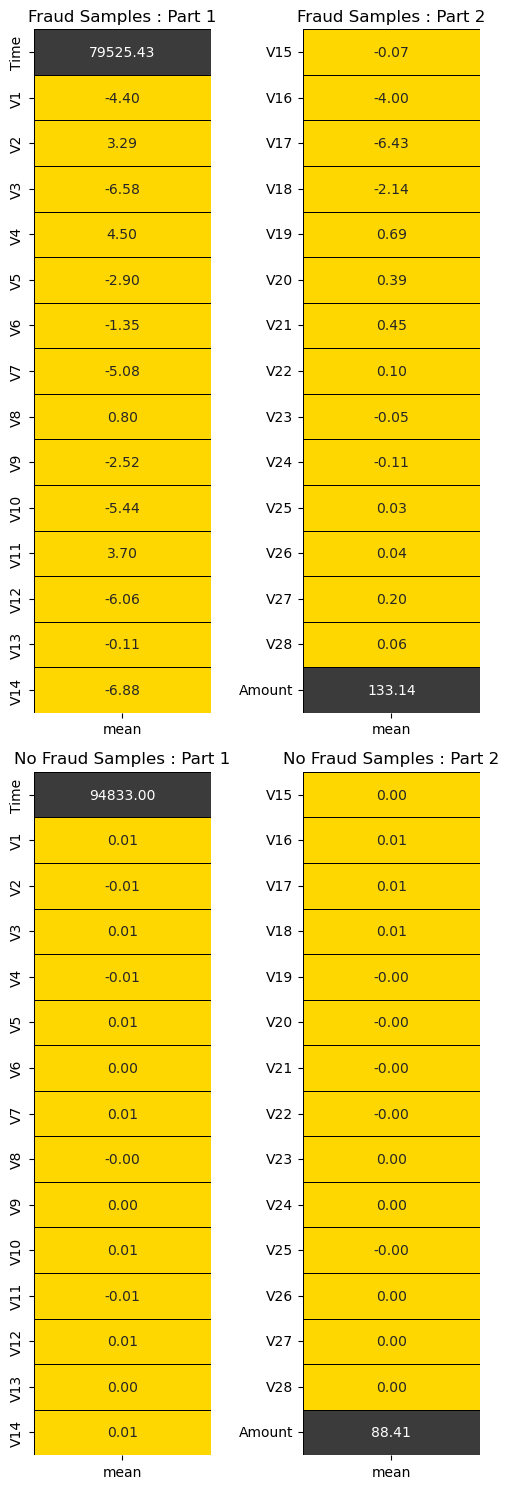

In [28]:
fraud = df[df['Class'] == 1].describe().T
nofraud = df[df['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

In [29]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
import time

In [31]:
from scipy.stats import skew 
hist, edges = np.histogram(raw_df['Amount'], density = True, bins = 50)
p2 = figure(
    x_axis_label = 'Amount',
    title = 'Distribution of Amount'
)

p2.quad(
    bottom = 0,
    top = hist,
    left = edges[:-1],
    right = edges[1:],
    line_color = 'white'
)

GlyphRenderer(id='p1076', ...)

In [32]:
hist, edges = np.histogram(raw_df['Time'], density = True, bins = 50)
p3 = figure(
    x_axis_label = 'Time',
    title = 'Distribution of Time'
)

p3.quad(
    bottom = 0,
    top = hist,
    left = edges[:-1],
    right = edges[1:],
    line_color = 'white'
)

GlyphRenderer(id='p1116', ...)

In [33]:
show(gridplot([[p2,p3]]))

<Axes: >

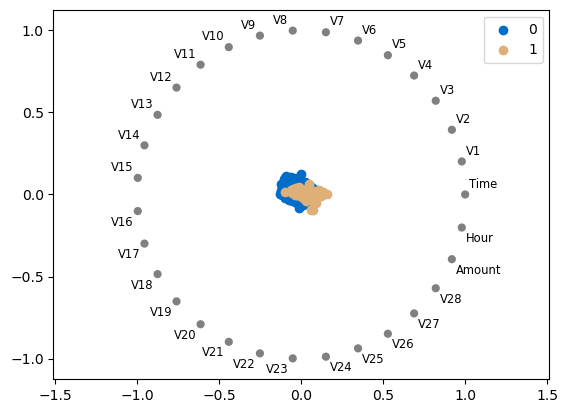

In [34]:
pd.plotting.radviz(df[vars], "Class",color=['#016CC9','#DEB078'])

number of frauds in each cluster

In [36]:
cluster_fraud_counts = df[df['Class'] == 1]['Cluster'].value_counts().sort_index()
cluster_fraud_counts

0     31
1    310
2      4
3     28
Name: Cluster, dtype: int64

Modelling

Logistic Regression

In [37]:
pip install imbalanced-learn


In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [39]:
from sklearn.preprocessing import RobustScaler

rob_scale = RobustScaler()

df['scaled_amount']=rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time']=rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1,inplace=True)


In [45]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Hour',
       'Cluster', 'scaled_amount', 'scaled_Time'],
      dtype='object')

Our dataset is imbalanced, so we decide it use SMOTE in order to get good performance.

In [46]:
df = df.drop("Cluster", axis=1)


In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in divide

C:\Users\mlike\anaconda\Lib\site-packages\matplotlib\colors.py:1355: RuntimeWarning:

invalid value encountered in divide



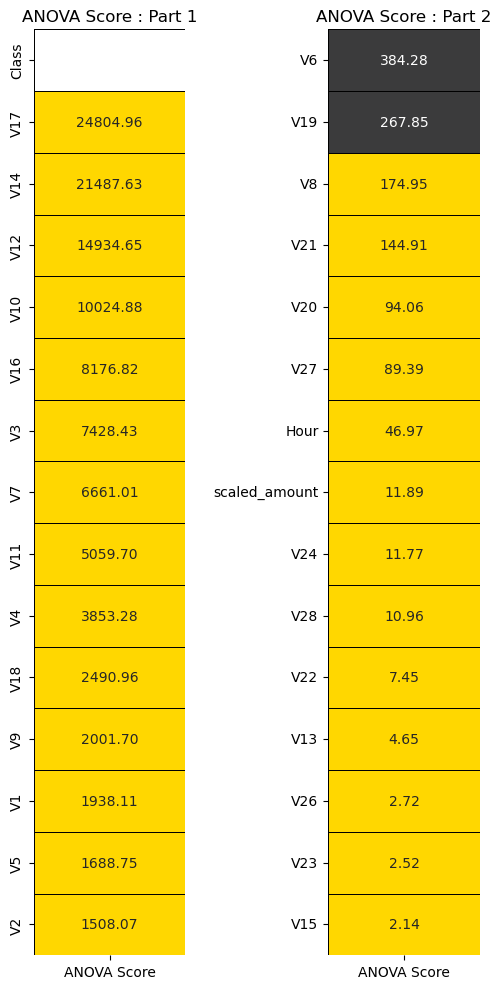

In [48]:
features = df.loc[:,:'scaled_amount']
target = df.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
From the above plot, we will reject features with values less than 50.
In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score.

In [49]:
#dataset Dataset for Model based on Correlation Plot 

In [50]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

V3        V4        V7       V10       V11       V12       V14  \
0  2.536347  1.378155  0.239599  0.090794 -0.551600 -0.617801 -0.311169   
1  0.166480  0.448154 -0.078803 -0.166974  1.612727  1.065235 -0.143772   
2  1.773209  0.379780  0.791461  0.207643  0.624501  0.066084 -0.165946   
3  1.792993 -0.863291  0.237609 -0.054952 -0.226487  0.178228 -0.287924   
4  1.548718  0.403034  0.592941  0.753074 -0.822843  0.538196 -1.119670   

        V16       V17  Class  
0 -0.470401  0.207971      0  
1  0.463917 -0.114805      0  
2 -2.890083  1.109969      0  
3 -1.059647 -0.684093      0  
4 -0.451449 -0.237033      0

In [51]:
#Dataset for Model based on ANOVA Score :

In [52]:
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()



V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V12       V14       V16       V17  \
0  0.098698  0.363787  0.090794  ... -0.617801 -0.311169 -0.470401  0.207971   
1  0.085102 -0.255425 -0.166974  ...  1.065235 -0.143772  0.463917 -0.114805   
2  0.247676 -1.514654  0.207643  ...  0.066084 -0.165946 -2.890083  1.109969   
3  0.377436 -1.387024 -0.054952  ...  0.178228 -0.287924 -1.059647 -0.684093   
4 -0.270533  0.817739  0.753074  ...  0.538196 -1.119670 -0.451449 -0.237033   

        V18       V19       V20       V21  Class  scaled_Time  
0  0.025791  0.403993  0.251412 -0.018307      0    -0.995311  
1 -0.183361 -0.145783 -0.069083 -0.225775      0    -0.995311  
2 -0.121359 -2.261857  0.524980  0.247998      0    -0.995299  
3  1.965775 -1.232622 -0.208038 -0.108300      0    -0.995299  
4 -0.038195  0.803487  0.408542 -0.009431      0    -0.995287  

[5 rows x 21 columns]

In [53]:
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V12       V14       V16       V17  \
0  0.098698  0.363787  0.090794  ... -0.617801 -0.311169 -0.470401  0.207971   
1  0.085102 -0.255425 -0.166974  ...  1.065235 -0.143772  0.463917 -0.114805   
2  0.247676 -1.514654  0.207643  ...  0.066084 -0.165946 -2.890083  1.109969   
3  0.377436 -1.387024 -0.054952  ...  0.178228 -0.287924 -1.059647 -0.684093   
4 -0.270533  0.817739  0.753074  ...  0.538196 -1.119670 -0.451449 -0.237033   

        V18       V19       V20       V21  Class  scaled_Time  
0  0.025791  0.403993  0.251412 -0.018307      0    -0.995311  
1 -0.183361 -0.145783 -0.069083 -0.225775      0    -0.995311  
2 -0.121359 -2.261857  0.524980  0.247998      0    -0.995299  
3  1.965775 -1.232622 -0.208038 -0.108300      0    -0.995299  
4 -0.038195  0.803487  0.408542 -0.009431      0    -0.995287  

[5 rows x 21 columns]

In [54]:
df2.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'Class',
       'scaled_Time'],
      dtype='object')

using the SMOTE (Synthetic Minority Over-sampling Technique) 
technique in combination with the RandomUnderSampler technique from 
the imbalanced-learn library to handle class imbalance. The goal is to 
resample the dataset to create a more balanced class distribution. After resampling, 
the Counter class is used to count the occurrences of each class in the target variable.

In [55]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [56]:
#Data Balancing for Model based on Correlation Plot :¶

In [57]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 =df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 3730, 1: 1865})

In [ ]:
#Data Balancing for Model based on ANOVA Score :


In [58]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,19].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)



Counter({0: 3730, 1: 1865})

In [59]:
from sklearn.metrics import RocCurveDisplay


#modelling

In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [61]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='Greens',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))



In [62]:
#logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Cross Validation Score :  97.91%
ROC_AUC Score :  92.80%


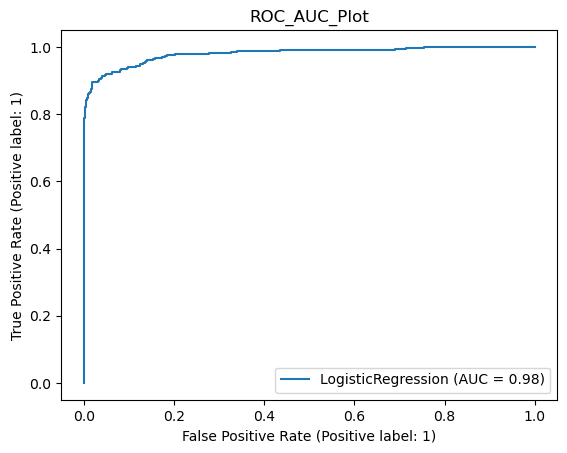

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       760
           1       0.96      0.87      0.92       359

    accuracy                           0.95      1119
   macro avg       0.95      0.93      0.94      1119
weighted avg       0.95      0.95      0.95      1119



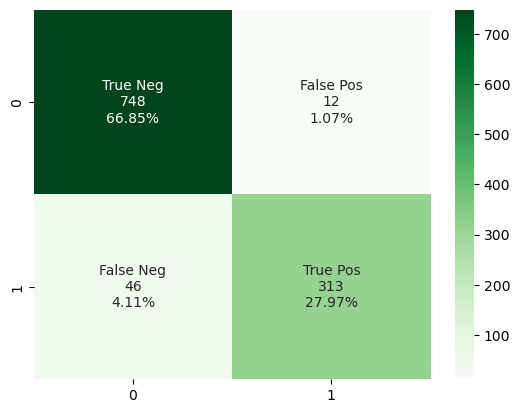

In [64]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

In [ ]:
#Model based on ANOVA Score :

In [65]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Cross Validation Score :  99.98%
ROC_AUC Score :  100.00%


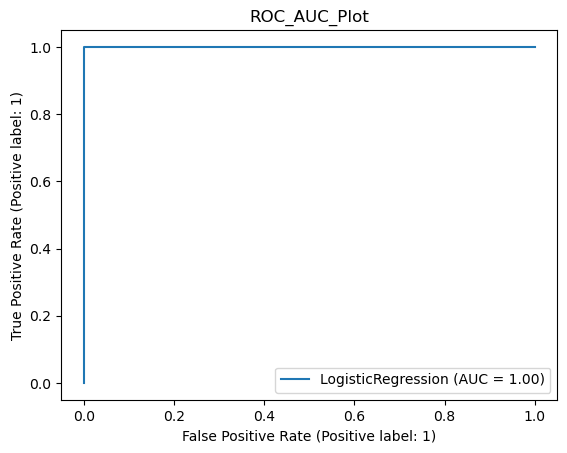

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       359

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



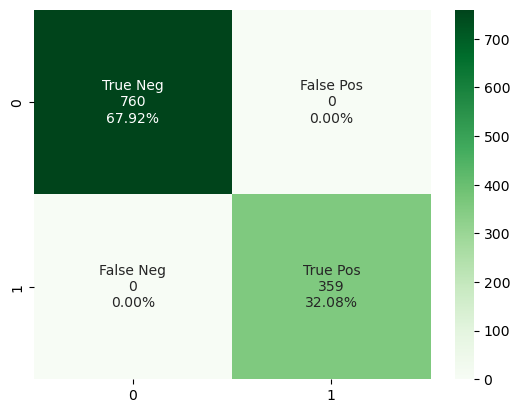

In [66]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

In [ ]:
#ANOVA Again with less features.
#df2 is dataset that created for anova

In [ ]:
df2.columns

In [ ]:
#df2_anova = df2.drop(['scaled_Time','V27', 'V21', 'V8', 'V19','V6'],axis=1)
#df2_anova


#'V2','V3','V9'

In [ ]:
df2_anova_class= df2_anova["Class"]
df2_anova_features = df2_anova[df2_anova.columns.difference(['Class'])]


In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f3 = df2_anova_features.values

t3 = df2_anova_class.values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f3, t3 = pipeline.fit_resample(f3, t3)
Counter(t2)


In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(f3, t3, test_size = 0.30, random_state = 2)

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=60,penalty= 'l2') 

In [ ]:
model(classifier_lr,x_train3,y_train3,x_test3,y_test3)
model_evaluation(classifier_lr,x_test3,y_test3)

In [ ]:
#support vector


In [67]:
from sklearn.svm import SVC


In [113]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Cross Validation Score :  97.70%
ROC_AUC Score :  92.03%


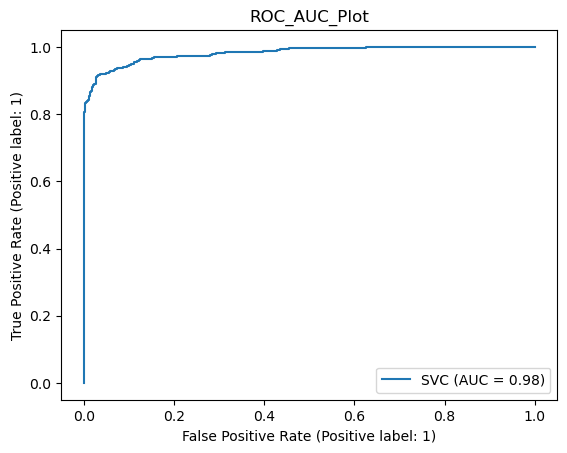

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       760
           1       0.97      0.85      0.91       359

    accuracy                           0.94      1119
   macro avg       0.95      0.92      0.93      1119
weighted avg       0.95      0.94      0.94      1119



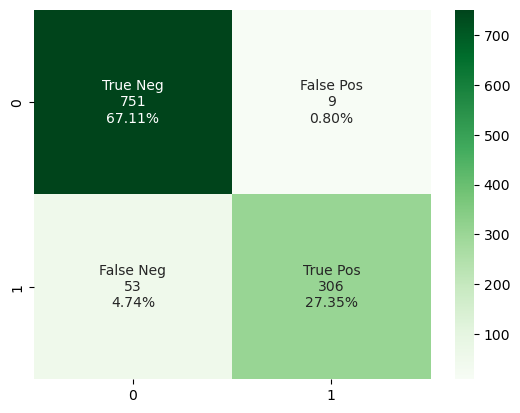

In [114]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

In [ ]:
#model based on ANOVA score


Cross Validation Score :  100.00%
ROC_AUC Score :  100.00%


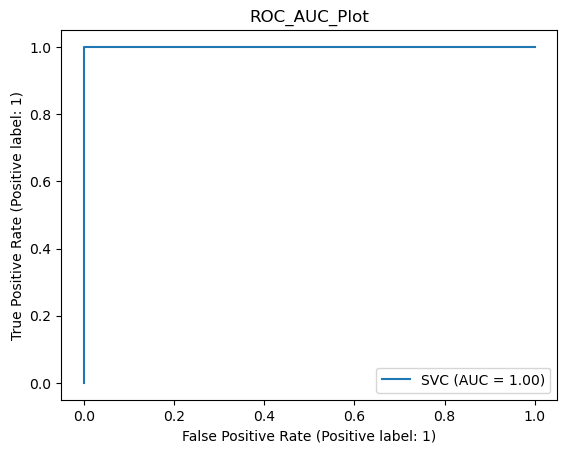

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       359

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



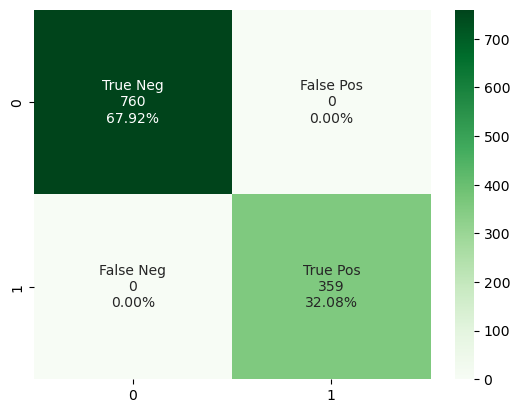

In [70]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

In [71]:
#desicion tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  97.36%
ROC_AUC Score :  94.22%


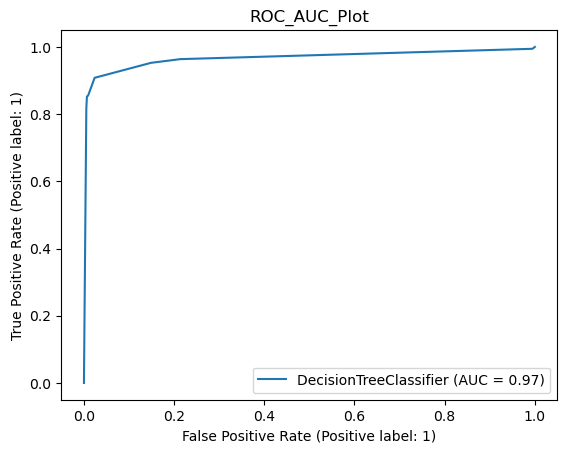

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       760
           1       0.95      0.91      0.93       359

    accuracy                           0.95      1119
   macro avg       0.95      0.94      0.95      1119
weighted avg       0.95      0.95      0.95      1119



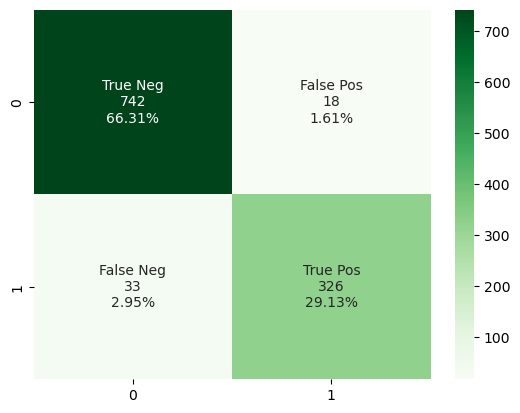

In [74]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  97.87%
ROC_AUC Score :  92.49%


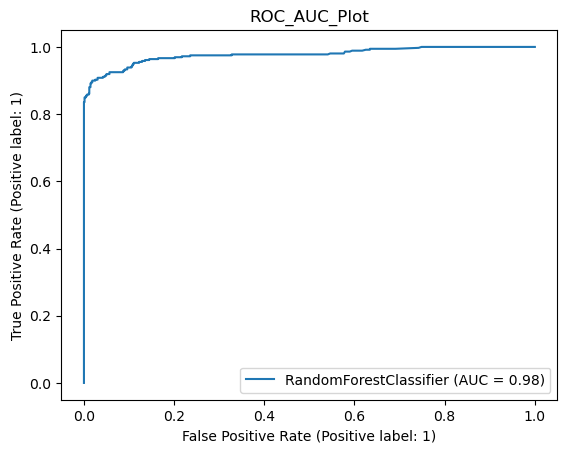

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       760
           1       0.99      0.86      0.92       359

    accuracy                           0.95      1119
   macro avg       0.96      0.92      0.94      1119
weighted avg       0.95      0.95      0.95      1119



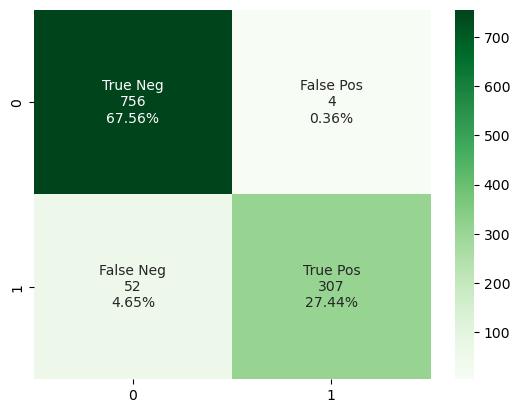

In [84]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

In [ ]:
#fianl test logistic model and the test that we have kept from beginning


In [ ]:
#logiscitc
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 


In [105]:
test_set = test_set[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)


In [106]:
test_set 

V3         V4         V7        V10       V11        V12  \
274842   0.161690  -0.798504   0.933765  -0.255274  0.504579   0.951403   
90161    0.741620   0.746450   0.136546  -0.092854  0.388966   0.944906   
41458    0.942716  -0.136235   0.686810  -0.506743 -0.978479  -0.407787   
154410  -2.092921   0.191727   0.755031  -0.280493  1.846121  -1.461476   
75020    0.633063   0.584094   0.207289   1.596623  0.533205   0.604059   
...           ...        ...        ...        ...       ...        ...   
151730  -1.310561   5.955664  -4.587235  -2.850324  2.024674  -6.487746   
6899    -7.653616   6.379742  -3.103570  -7.191604  7.102989  -9.928700   
223572  -4.242710   5.036985  -3.449159  -5.653638  3.942316  -5.883724   
10891  -16.587073  10.107274 -15.600323 -12.938929  8.805682 -13.556130   
123301  -0.180678   1.287839   0.525167  -2.544410  0.707000  -0.835696   

              V14       V16        V17  Class  
274842   0.190258  0.194478  -0.828442      0  
90161    0.123923  0.113382  -0.271922      0  
41458   -0.460737  0.631608  -0.291045      0  
154410   2.368907 -0.361398   0.127933      0  
75020   -0.172642 -0.450105  -0.137874      0  
...           ...       ...        ...    ...  
151730  -2.241516 -3.936857  -6.127194      1  
6899   -10.924187 -2.379421  -2.775114      1  
223572  -9.266120 -2.205644  -5.709087      1  
10891   -9.809882 -9.505210 -17.542030      1  
123301  -4.993992  1.315365   3.639200      1  

[200 rows x 10 columns]

In [107]:
X_test = test_set.drop('Class', axis=1)  # Features
y_test = test_set['Class']  # Labels


In [108]:
predictions = classifier_lr.predict(X_test)


C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.98      0.89      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



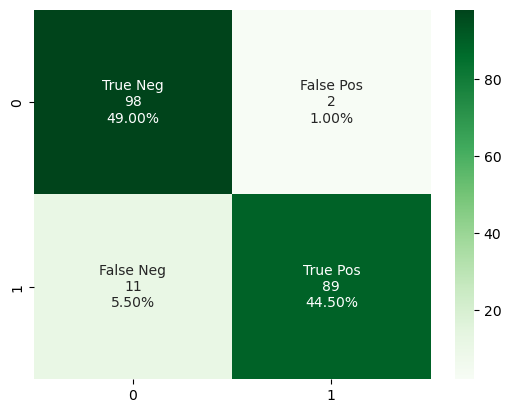

In [109]:
model_evaluation(classifier_lr, X_test, y_test)


In [110]:
#svm 

In [115]:
predictions = classifier_svc.predict(X_test)


C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SVC was fitted without feature names



              precision    recall  f1-score   support

           0       0.90      0.99      0.94       100
           1       0.99      0.89      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SVC was fitted without feature names

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SVC was fitted without feature names



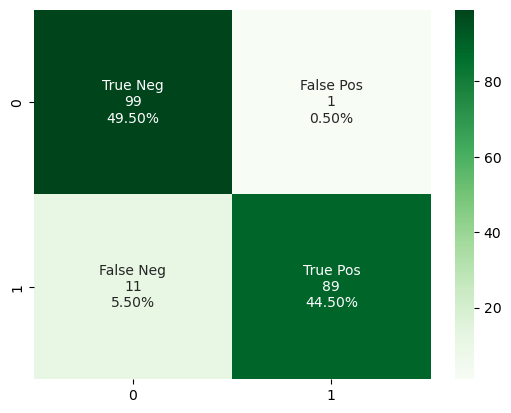

In [116]:
model_evaluation(classifier_svc, X_test, y_test)


In [ ]:
#desicion tree


In [117]:
predictions = classifier_dt.predict(X_test)


C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.90      0.95      0.92       100
           1       0.95      0.89      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



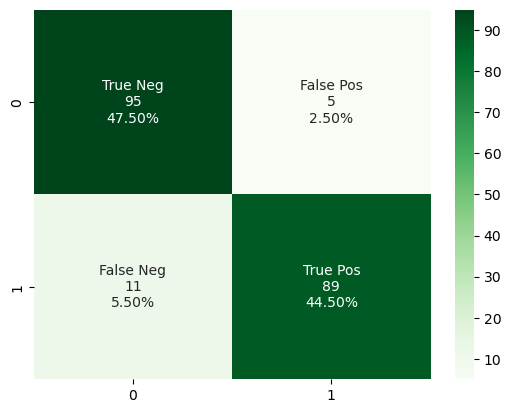

In [118]:
model_evaluation(classifier_dt, X_test, y_test)


In [ ]:
#random forest 

In [119]:
predictions = classifier_rf.predict(X_test)


C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.88      1.00      0.93       100
           1       1.00      0.86      0.92       100

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200



C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\mlike\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



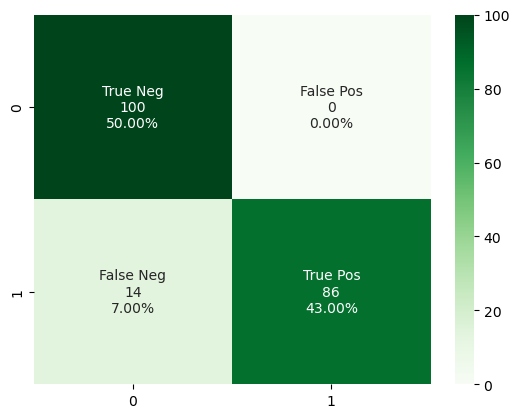

In [120]:
model_evaluation(classifier_rf, X_test, y_test)
